# Linear Regression Implementaton From Scratch:

In [47]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [161]:
def Linear_Regression(X_train,y_train):
    #Find Slope and Intercept of a Line
    # Cov(x,y)/var(x)
    # b = (n * sum(xy) - sum(x)* sum(xy)) / n* sum(x**2)- (sum(x))**2
    n = X_train.shape[0]
    # usning calculas
    b = ((n * np.sum((X_train * y_train)) )-(np.sum(X_train)*np.sum(X_train*y_train)))/((n*np.sum(X_train**2)-np.sum(X_train)**2))
    a = np.mean(y_train)-b*np.mean(X_train)
    
    return a,b

In [204]:
#Find Coefficients using statistics
def estimate_coef(X_train, y_train):
    # number of observations/points
    n = X_train.shape[0]
    print('n value:',n)
    # mean of x and y vector
    m_x, m_y = np.mean(X_train), np.mean(y_train)
    print('mean values:',m_x,m_y)
    # calculating cross-deviation and deviation about x
    SS_xy = (np.sum(y_train*X_train)/n)-m_y*m_x
    SS_xx = (np.sum(X_train*X_train)/n)-m_x*m_x
    print('SS_xy,SS_xx',SS_xy,SS_xx)
    # calculating regression coefficients
    b = SS_xy/SS_xx
    a = m_y-b*m_x

    return a,b

In [89]:
def Linear_Regression_Predict(a,b,X_test):
        return a+b*X_test

In [55]:
# Data
np.random.seed()
X = np.random.randn(1,10,100)
y = 2*X+10

In [57]:
# Vector Space of X
X = X.reshape(-1,1)
X.shape

(1000, 1)

In [59]:
#vector space y
y = y.reshape(-1,1)
y.shape

(1000, 1)

In [60]:

#Training Data for Model
X_train = X[:-10]
y_train = y[:-10]

In [61]:
#testing Data for Model
X_test = X[990:]
y_test = y[990:]

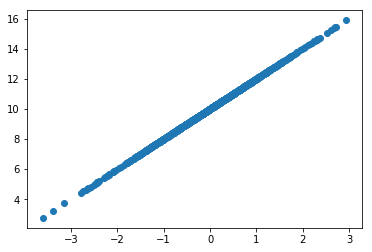

In [62]:
# Distribution of Training Data
plt.scatter(X_train,y_train)

In [90]:
#To find  Regression Coefficients
#a = Intercept b=slop
a,b = Linear_Regression(X_train,y_train)


In [91]:
print(a,b)

9.99530221599 1.79550919811


In [207]:
y_pred = Linear_Regression_Predict(a,b,X_test)

In [208]:
y_pred = Linear_Regression_Predict(a,b,X_test)

In [209]:
y_pred

array([[  9.49061815],
       [ 12.72817483],
       [ 10.98380523],
       [  9.3516039 ],
       [ 11.79615907],
       [ 13.3812599 ],
       [  8.90137042],
       [ 12.78542997],
       [  9.5718305 ],
       [ 10.1664383 ]])

In [96]:
y_test

array([[  9.49061815],
       [ 12.72817483],
       [ 10.98380523],
       [  9.3516039 ],
       [ 11.79615907],
       [ 13.3812599 ],
       [  8.90137042],
       [ 12.78542997],
       [  9.5718305 ],
       [ 10.1664383 ]])

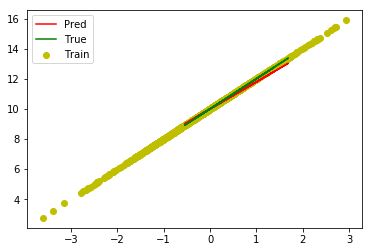

In [120]:
plt.scatter(X_train,y_train,c='y',label='Train')
plt.plot(X_test,y_pred,c='r',label='Pred')
plt.plot(X_test,y_test,c='g',label='True')
plt.legend()

In [124]:
Error = np.sum((y_test-y_pred)**2)

In [150]:
print(np.sqrt(Error))

0.594335040202


In [129]:
#using scikit
from sklearn.linear_model import LinearRegression

In [130]:
lr = LinearRegression()

In [136]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [156]:
y_pred_scikit = lr.predict(X_test)

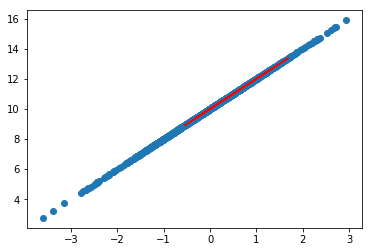

In [158]:
plt.scatter(X_train,y_train)
plt.plot(X_test,y_pred_scikit,c='r')

In [153]:
print(y_pred_scikit)

[[  9.49061815]
 [ 12.72817483]
 [ 10.98380523]
 [  9.3516039 ]
 [ 11.79615907]
 [ 13.3812599 ]
 [  8.90137042]
 [ 12.78542997]
 [  9.5718305 ]
 [ 10.1664383 ]]


In [155]:
y_test

array([[  9.49061815],
       [ 12.72817483],
       [ 10.98380523],
       [  9.3516039 ],
       [ 11.79615907],
       [ 13.3812599 ],
       [  8.90137042],
       [ 12.78542997],
       [  9.5718305 ],
       [ 10.1664383 ]])

In [151]:
Error_scikit = np.sum((y_test-y_pred_scikit)**2)

In [159]:
print(np.sqrt(Error_scikit))

5.89150913007e-15


In [205]:
a,b = estimate_coef(X_train,y_train)

n value: 990
mean values: -0.022973082243 9.95405383551
SS_xy,SS_xx 1.86816409106 0.934082045528


In [210]:
print(a,b)


10.0 2.0


In [216]:
y_pred_stats = Linear_Regression_Predict(a,b,X_test)

In [217]:
y_pred_stats

array([[  9.49061815],
       [ 12.72817483],
       [ 10.98380523],
       [  9.3516039 ],
       [ 11.79615907],
       [ 13.3812599 ],
       [  8.90137042],
       [ 12.78542997],
       [  9.5718305 ],
       [ 10.1664383 ]])

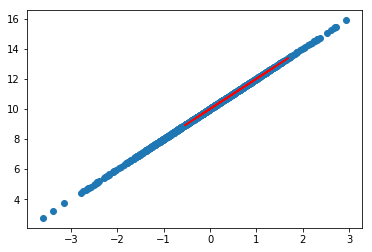

In [220]:
plt.scatter(X_train,y_train)
plt.plot(X_test,y_pred_stats,c='r')

In [259]:
# Fiind Regression Line using Linear Algebra
A = X_train

In [260]:
b = y_train

In [263]:

l = np.dot(A.T, A)
r = np.dot(A.T, b)

slope = np.dot(np.linalg.inv(l), r)

In [264]:
print(slope)

[[ 1.75419601]]
